<a href="https://colab.research.google.com/github/sg758253/sg1205/blob/main/ADVDS/project7/FacialRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Name: sachin gupta
*   Project: 7 FacialRecognition
*   Description: The facesDB dataset contains 400 greyscale BMP images, where each image is 48x48 pixels and has 3 channels. There are 40 subjects, and 10 images per subject arranged in folders S1-S40. 


In [1]:
#import library
import numpy as mean
import numpy as std
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
import os
import random
import tensorflow as tf

from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.models import save_model, load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%pip install visualkeras
import visualkeras



     |████████████████████████████████| 992 kB 4.4 MB/s 


In [2]:
!wget 'https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project7/facesDB.zip'

--2022-03-18 04:11:25--  https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project7/facesDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1374115 (1.3M) [application/zip]
Saving to: ‘facesDB.zip’

facesDB.zip         100%[===================>]   1.31M  --.-KB/s    in 0.06s   

2022-03-18 04:11:28 (20.8 MB/s) - ‘facesDB.zip’ saved [1374115/1374115]



In [3]:
# unzip files
!unzip facesDB.zip
trainX=[]
trainY=[]
testX=[]
testY=[]

Archive:  facesDB.zip
   creating: facesDB/S1/
  inflating: facesDB/S1/1.BMP        
  inflating: facesDB/S1/10.BMP       
  inflating: facesDB/S1/2.BMP        
  inflating: facesDB/S1/3.BMP        
  inflating: facesDB/S1/4.BMP        
  inflating: facesDB/S1/5.BMP        
  inflating: facesDB/S1/6.BMP        
  inflating: facesDB/S1/7.BMP        
  inflating: facesDB/S1/8.BMP        
  inflating: facesDB/S1/9.BMP        
  inflating: facesDB/S1/Thumbs.db    
   creating: facesDB/S10/
  inflating: facesDB/S10/1.BMP       
  inflating: facesDB/S10/10.BMP      
  inflating: facesDB/S10/2.BMP       
  inflating: facesDB/S10/3.BMP       
  inflating: facesDB/S10/4.BMP       
  inflating: facesDB/S10/5.BMP       
  inflating: facesDB/S10/6.BMP       
  inflating: facesDB/S10/7.BMP       
  inflating: facesDB/S10/8.BMP       
  inflating: facesDB/S10/9.BMP       
  inflating: facesDB/S10/Thumbs.db   
   creating: facesDB/S11/
  inflating: facesDB/S11/1.BMP       
  inflating: facesDB/S11/10

In [4]:
for i in range(1, 41):
  randomSample = random.sample(range(1, 11), 2)
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in randomSample:
      testX.append(img)
      testY.append(i - 1)
    else:
      trainX.append(img)
      trainY.append(i - 1)
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

print("Train x shape: ",trainX.shape)
print("Test x shape: ",testX.shape)
print("Train y shape: ",trainY.shape)
print("Test y shape: ",testY.shape)

Train x shape:  (320, 48, 48, 3)
Test x shape:  (80, 48, 48, 3)
Train y shape:  (320,)
Test y shape:  (80,)


Found 400 files. taking 320 files for training and remaining 80 for testing.

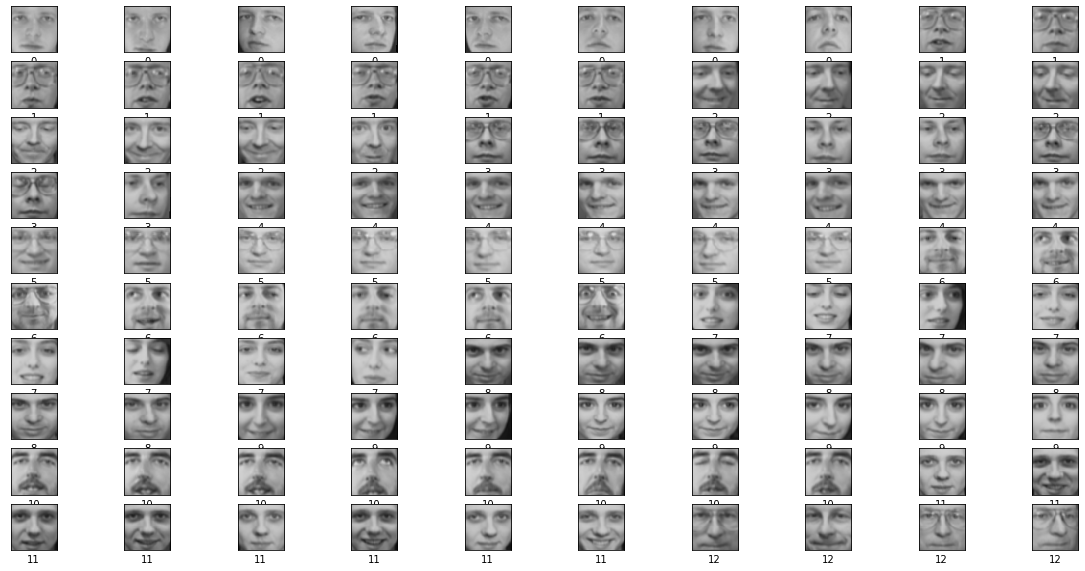

In [5]:
#Display images
plt.figure(figsize=(20, 10))
for i in range( 100 ):
    plt.subplot( 10, 10, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(trainY[i])
plt.show()

In [6]:
# one hot encode target value 
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainY.shape)
print(testY.shape)

(320, 40)
(80, 40)


In [7]:
# normalized the pixel values of grayscale images, e.g. rescale them to range [0,1]

# convert from integer to float
trainX = trainX.astype( 'float32')/255
testX = testX.astype('float32')/255

# Model creation

In [8]:
#The CNN model has two main aspects: the feature extraction front end comprised of 
# convolutional and pooling layers, and the classifier backend that will make a prediction.

def create_compile_model_1():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [9]:
model1 =create_compile_model_1()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:

# fitting the model
model1fitting = model1.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY),verbose=True)


model1_train_accuracy = model1fitting.history['accuracy']
model1_validation_accuracy = model1fitting.history['val_accuracy']

model1_train_loss = model1fitting.history['loss']
model1_validation_loss = model1fitting.history['val_loss']


Epoch 1/100
10/10 [==============================] - 13s 126ms/step - loss: 3.7029 - accuracy: 0.0188 - val_loss: 3.6871 - val_accuracy: 0.0375
Epoch 2/100
10/10 [==============================] - 0s 31ms/step - loss: 3.6935 - accuracy: 0.0250 - val_loss: 3.6850 - val_accuracy: 0.0250
Epoch 3/100
10/10 [==============================] - 0s 28ms/step - loss: 3.6907 - accuracy: 0.0219 - val_loss: 3.6848 - val_accuracy: 0.0250
Epoch 4/100
10/10 [==============================] - 0s 31ms/step - loss: 3.6852 - accuracy: 0.0281 - val_loss: 3.6827 - val_accuracy: 0.0250
Epoch 5/100
10/10 [==============================] - 0s 39ms/step - loss: 3.6889 - accuracy: 0.0344 - val_loss: 3.6803 - val_accuracy: 0.0250
Epoch 6/100
10/10 [==============================] - 0s 38ms/step - loss: 3.6849 - accuracy: 0.0312 - val_loss: 3.6786 - val_accuracy: 0.0250
Epoch 7/100
10/10 [==============================] - 0s 34ms/step - loss: 3.6845 - accuracy: 0.0344 - val_loss: 3.6767 - val_accuracy: 0.0500
Epoc

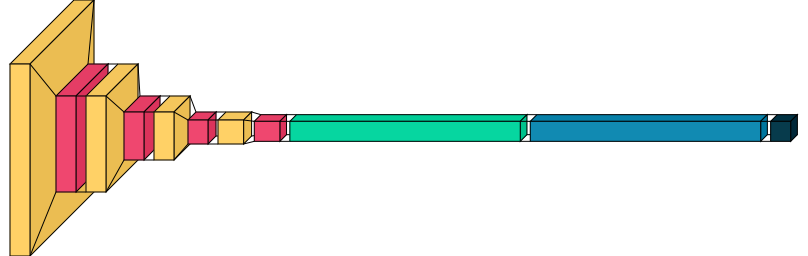

In [11]:
# Draw model1's architecture
visualkeras.layered_view(model1)

In [12]:
 #Model3
def create_compile_model_3():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [13]:
model3 =create_compile_model_3()
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                589856    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:

# fitting the model
model3fitting = model3.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY),verbose=True)


model3_train_accuracy = model3fitting.history['accuracy']
model3_validation_accuracy = model3fitting.history['val_accuracy']

model3_train_loss = model3fitting.history['loss']
model3_validation_loss = model3fitting.history['val_loss']


Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 3.7072 - accuracy: 0.0281 - val_loss: 3.6885 - val_accuracy: 0.0500
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 3.6901 - accuracy: 0.0188 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 3.6900 - accuracy: 0.0188 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 3.6900 - accuracy: 0.0125 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 3.6892 - accuracy: 0.0156 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 3.6892 - accuracy: 0.0281 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 3.6888 - accuracy: 0.0344 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 

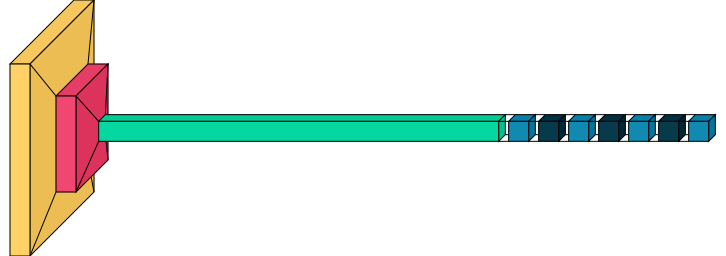

In [15]:
# Draw model3's architecture
visualkeras.layered_view(model3)

In [16]:
#Model4

def create_compile_model_4():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Dropout(0.9),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.9),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.9),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.9),
    Dense(64, activation="relu"),
    Dropout(0.9),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [17]:
model4 =create_compile_model_4()
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
# fitting the model
model4fitting = model4.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY),verbose=True)

model4_train_accuracy = model4fitting.history['accuracy']
model4_validation_accuracy = model4fitting.history['val_accuracy']

model4_train_loss = model4fitting.history['loss']
model4_validation_loss = model4fitting.history['val_loss']


Epoch 1/100
10/10 [==============================] - 1s 59ms/step - loss: 12.4917 - accuracy: 0.0219 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 3.6994 - accuracy: 0.0188 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 3.6969 - accuracy: 0.0344 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 4/100
10/10 [==============================] - 0s 22ms/step - loss: 3.6928 - accuracy: 0.0219 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 5/100
10/10 [==============================] - 0s 22ms/step - loss: 3.7008 - accuracy: 0.0156 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 6/100
10/10 [==============================] - 0s 22ms/step - loss: 3.6971 - accuracy: 0.0375 - val_loss: 3.6890 - val_accuracy: 0.0250
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 3.6867 - accuracy: 0.0156 - val_loss: 3.6890 - val_accuracy: 0.0250
Epoch

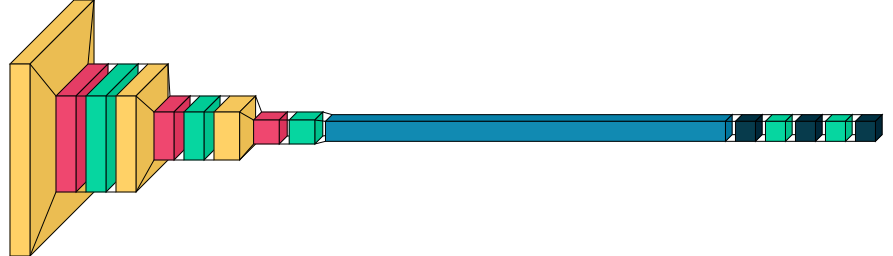

In [19]:
# Draw model4's architecture
visualkeras.layered_view(model4)

In [20]:
#Model5

def create_compile_model_5():
  model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=trainX[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.8),
    Dense(64, activation="relu"),
    Dropout(0.8),
    Dense(40, activation="softmax")
    ])
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [21]:
model5 =create_compile_model_5()
model5.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 256)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:
# fitting the model
model5fitting = model5.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY),verbose=True)

model5_train_accuracy = model5fitting.history['accuracy']
model5_validation_accuracy = model5fitting.history['val_accuracy']

model5_train_loss = model5fitting.history['loss']
model5_validation_loss = model5fitting.history['val_loss']


Epoch 1/100
10/10 [==============================] - 1s 45ms/step - loss: 3.7775 - accuracy: 0.0219 - val_loss: 3.6887 - val_accuracy: 0.0250
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 3.6968 - accuracy: 0.0125 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 3/100
10/10 [==============================] - 0s 22ms/step - loss: 3.6919 - accuracy: 0.0250 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 3.6861 - accuracy: 0.0344 - val_loss: 3.6883 - val_accuracy: 0.0375
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 3.7017 - accuracy: 0.0156 - val_loss: 3.6887 - val_accuracy: 0.0250
Epoch 6/100
10/10 [==============================] - 0s 23ms/step - loss: 3.6917 - accuracy: 0.0219 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 3.6887 - accuracy: 0.0188 - val_loss: 3.6889 - val_accuracy: 0.0250
Epoch 

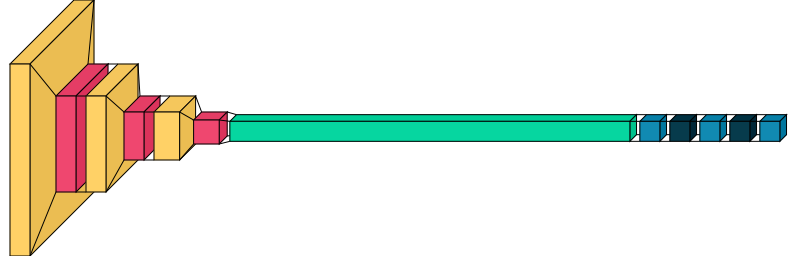

In [23]:
# Draw model5's architecture
visualkeras.layered_view(model5)

Plotting all accuracy and loss

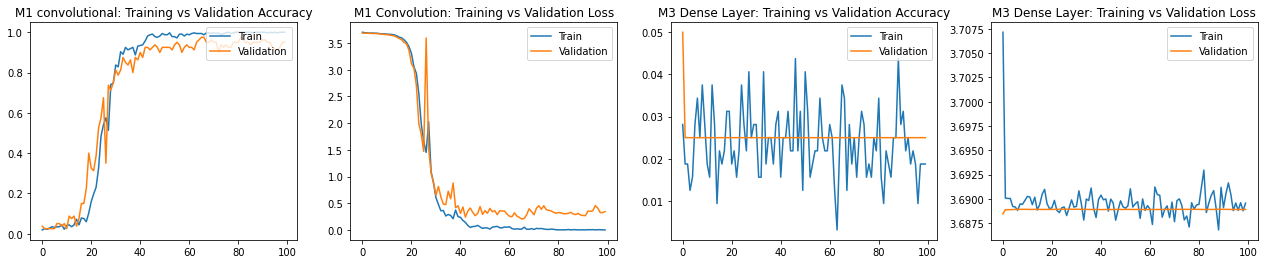

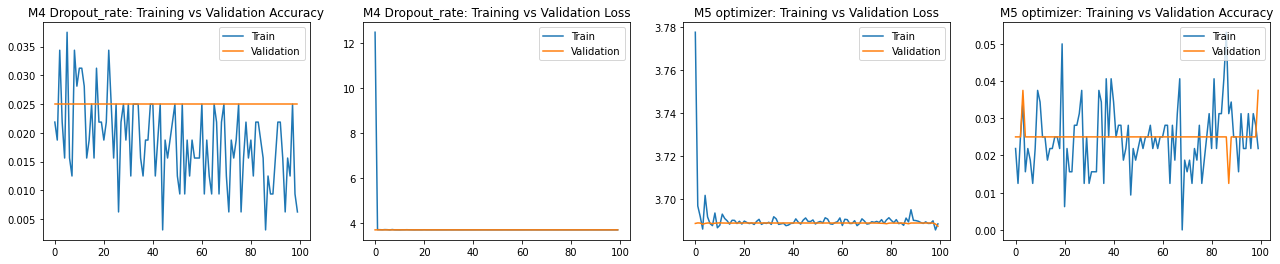

In [24]:
plt.figure(figsize=(22, 4))

plt.subplot(1, 4, 1)
plt.plot(model1_train_accuracy, label='Train')
plt.plot(model1_validation_accuracy, label='Validation')
plt.legend(loc='upper right')
plt.title('M1 convolutional: Training vs Validation Accuracy')

plt.subplot(1, 4, 2)
plt.plot(model1_train_loss, label='Train')
plt.plot(model1_validation_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('M1 Convolution: Training vs Validation Loss')

plt.subplot(1, 4, 3)
plt.plot(model3_train_accuracy, label='Train')
plt.plot(model3_validation_accuracy, label='Validation')
plt.legend(loc='upper right')
plt.title('M3 Dense Layer: Training vs Validation Accuracy')

plt.subplot(1, 4, 4)
plt.plot(model3_train_loss, label='Train')
plt.plot(model3_validation_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('M3 Dense Layer: Training vs Validation Loss')

plt.show()


plt.figure(figsize=(22, 4))
plt.subplot(1, 4, 1)
plt.plot(model4_train_accuracy, label='Train')
plt.plot(model4_validation_accuracy, label='Validation')
plt.legend(loc='upper right')
plt.title('M4 Dropout_rate: Training vs Validation Accuracy')

plt.subplot(1, 4, 2)
plt.plot(model4_train_loss, label='Train')
plt.plot(model4_validation_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('M4 Dropout_rate: Training vs Validation Loss')

plt.subplot(1, 4, 3)
plt.plot(model5_train_loss, label='Train')
plt.plot(model5_validation_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('M5 optimizer: Training vs Validation Loss')

plt.subplot(1, 4, 4)
plt.plot(model5_train_accuracy, label='Train')
plt.plot(model5_validation_accuracy, label='Validation')
plt.legend(loc='upper right')
plt.title('M5 optimizer: Training vs Validation Accuracy')

plt.show()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


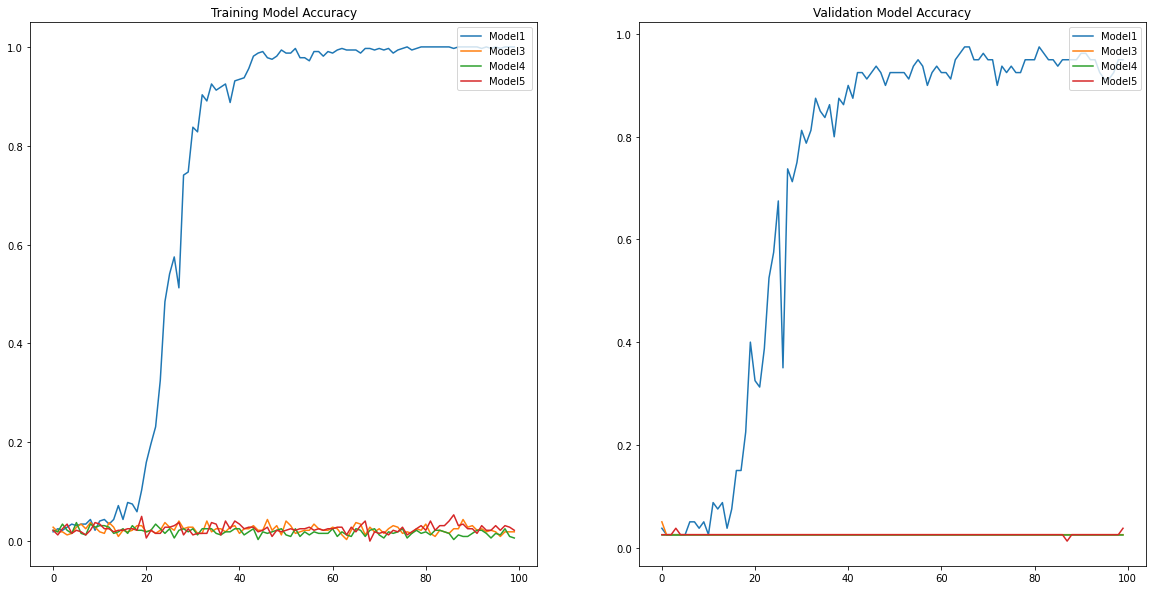

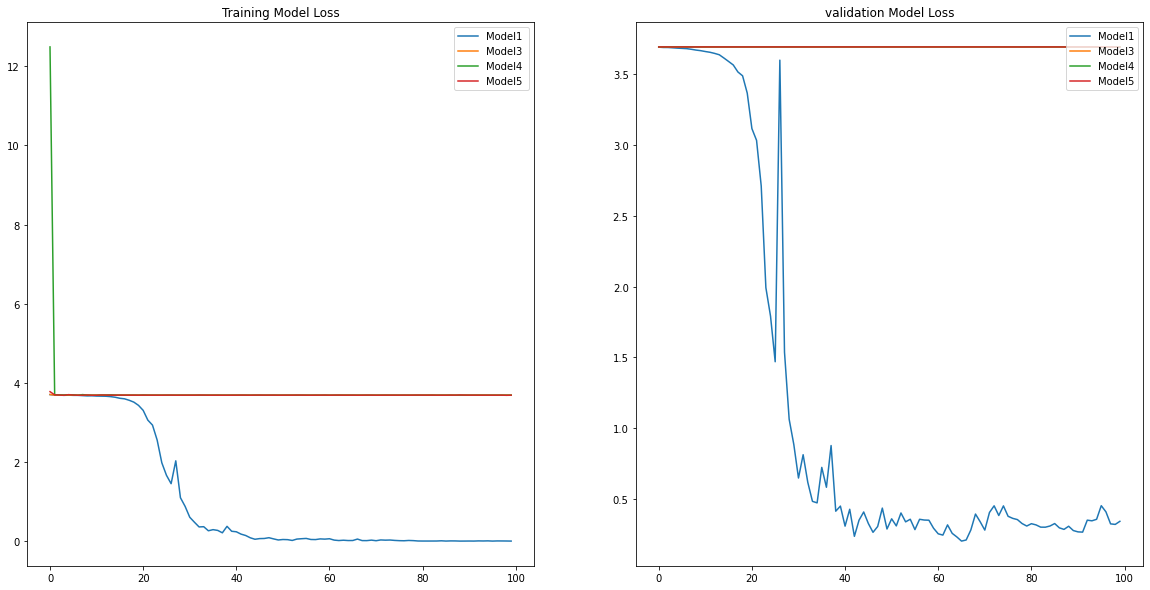

In [25]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(model1_train_accuracy, label='Model1 ')
plt.plot(model3_train_accuracy, label='Model3')
plt.plot(model4_train_accuracy, label='Model4')
plt.plot(model5_train_accuracy, label='Model5')
plt.legend(loc='upper right')
plt.title('Training Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(model1_validation_accuracy, label='Model1')
plt.plot(model3_validation_accuracy, label='Model3')
plt.plot(model4_validation_accuracy, label='Model4')
plt.plot(model5_validation_accuracy, label='Model5')
plt.subplot(1, 2, 2)
plt.legend(loc='upper right')
plt.title('Validation Model Accuracy')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(model1_train_loss, label='Model1 ')
plt.plot(model3_train_loss, label='Model3')
plt.plot(model4_train_loss, label='Model4')
plt.plot(model5_train_loss, label='Model5')
plt.legend(loc='upper right')
plt.title('Training Model Loss')

plt.subplot(1, 2, 2)
plt.plot(model1_validation_loss, label='Model1')
plt.plot(model3_validation_loss, label='Model3')
plt.plot(model4_validation_loss, label='Model4')
plt.plot(model5_validation_loss, label='Model5')

plt.legend(loc='upper right')
plt.title('validation Model Loss')
plt.show()






In [26]:
# Evaluate the model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds):
	scores, histories = list(), list()
 
  # prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)

	# evaluate splits
	for train_ix, test_ix in kfold.split(dataX):
		#select rowsfor train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		
		#fit model
		history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=0)

		#evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('CV Fold accuracy:  %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)  
	return scores, histories

In [27]:
# Plot learning curves
def summarize_learning(histories):
  for i in range(len(histories)):
    
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='red', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    plt.show()

In [28]:
# Summarize model performance
def summarize_performance(scores):
	
	#print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

In [29]:
# The main driver for evaluating the model

def process(model, num_folds):
	# evaluate the model using CV
	scores, histories = evaluate_model(model, trainX, trainY, num_folds)
 
	# learning curves
	summarize_learning(histories)
 
	# summarize estimated performance
	summarize_performance(scores)

CV Fold accuracy:  100.000
CV Fold accuracy:  100.000


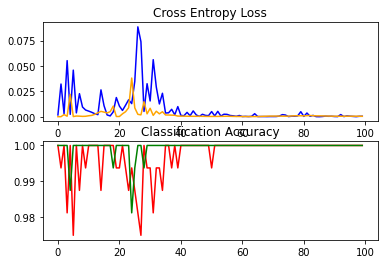

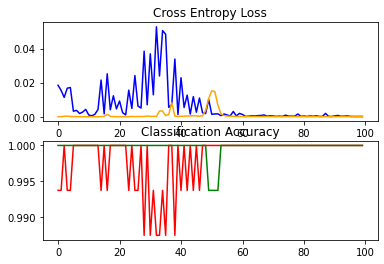

Model Accuracy: mean=100.000 std=0.000, folds=2


In [30]:
# Experiment with CNN architectures
num_folds = 2
# evaluate the model
process(model1, num_folds)
# save the model
model1.save('model1.h5')

CV Fold accuracy:  1.250
CV Fold accuracy:  0.625


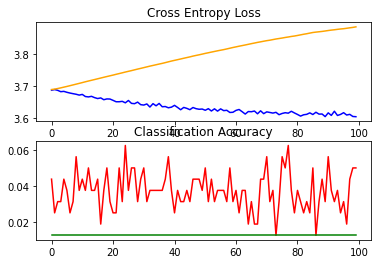

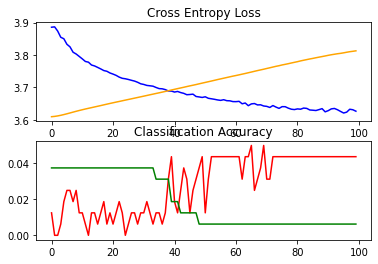

Model Accuracy: mean=0.938 std=0.313, folds=2


In [31]:
# process model3
num_folds = 2
# evaluate the model
process(model3, num_folds)
# save the model
model3.save('model3.h5')

CV Fold accuracy:  1.250
CV Fold accuracy:  0.625


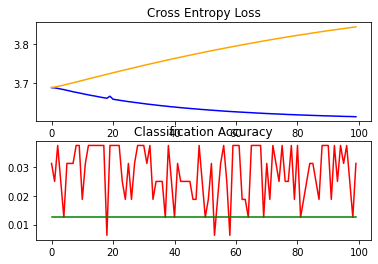

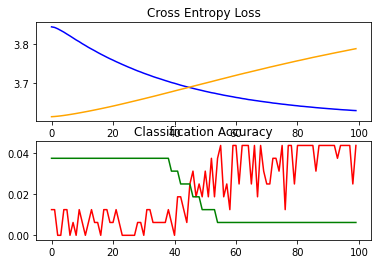

Model Accuracy: mean=0.938 std=0.313, folds=2


In [32]:
# process model4
num_folds = 2
# evaluate the model
process(model4, num_folds)
# save the model
model4.save('model4.h5')

CV Fold accuracy:  1.250
CV Fold accuracy:  1.250


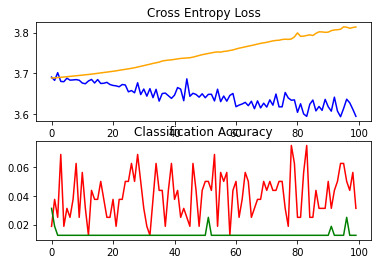

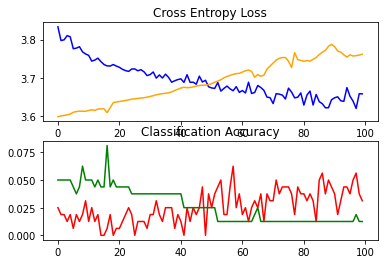

Model Accuracy: mean=1.250 std=0.000, folds=2


In [33]:
# process model5
num_folds = 2
# evaluate the model
process(model5, num_folds)
# save the model
model5.save('model5.h5')

In [34]:
summarize_performance(model1_train_accuracy)
summarize_performance(model3_train_accuracy)
summarize_performance(model4_train_accuracy)
summarize_performance(model5_train_accuracy)

Model Accuracy: mean=73.806 std=38.696, folds=100
Model Accuracy: mean=2.375 std=0.798, folds=100
Model Accuracy: mean=1.863 std=0.717, folds=100
Model Accuracy: mean=2.453 std=0.878, folds=100


[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Prediction')]

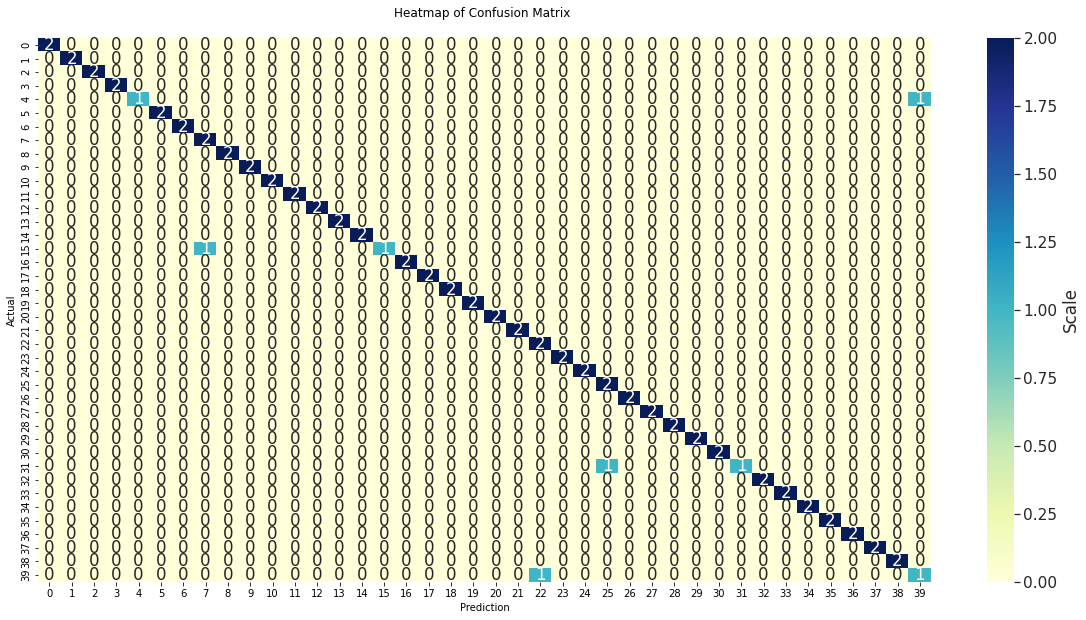

In [35]:
testY_arg=np.argmax(testY, axis=1)
test_prediction=np.argmax(model1.predict(testX), axis = 1)
cm = confusion_matrix(testY_arg, test_prediction)

plt.figure(figsize=(20,10))
plt.title("Heatmap of Confusion Matrix \n")

sns.set(color_codes=True)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cmap='YlGnBu',cbar_kws={'label': 'Scale'}, annot=True)
hm.set(xlabel="Prediction", ylabel = "Actual")



Summary:
To undertake a variety of studies, a number of distinct models are built. The training and testing datasets were divided into an 80-20% ratio. Finally, the performance of model 1 is shown to be superior than that of other models. Conv and max-pool are used four times in model 1 and flattened, dropout, and dense layers are used once. The use of the GPU benefits a number of models.